Tugas ini berupa mini project yang diselesaikan diakhir pertemuan bulan pertama. Tugas disusun sesuai dengan materi yang diberikan tiap harinya di pekan 4. 

# Dataset

silahkan unduh dataset berikut untuk mengerjakan tugas pekan 4:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [337]:
#Load data dari csv
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0




---



---



---



# Soal 1. Statistika Deskriptif

Lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [338]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Cek keberadaan missing value sebelum imputasi

In [339]:
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

isi nilai nan dengan menggunakan metode 'ffill' 

In [340]:
df_ffill = df.fillna(method="ffill")

Cek kembali keberadaan missing value setelah imputasi

In [341]:
df_ffill.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64



---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

In [342]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn

def plottingBoxplot(columns):
  plt.figure(figsize=(12,8))

  for i,col in enumerate(columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=df_ffill[col])
    plt.tight_layout()

  plt.show()

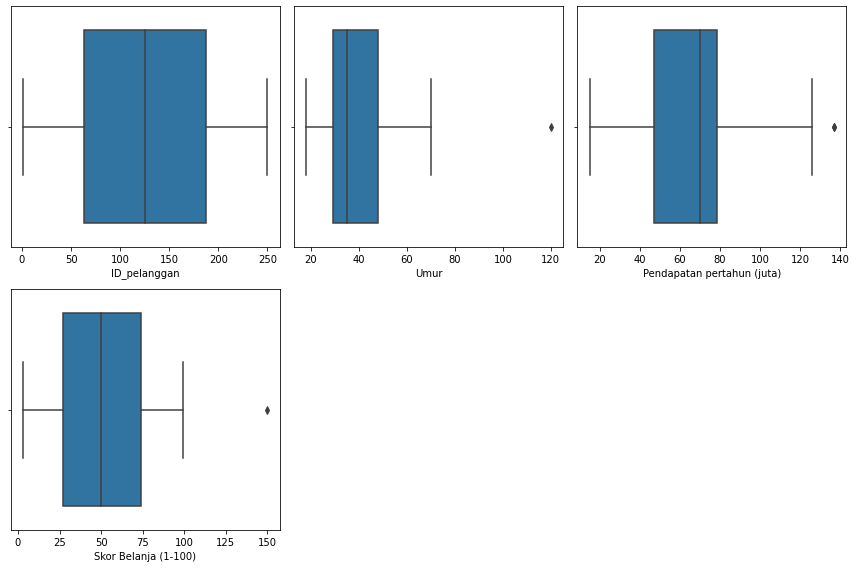

In [343]:
plottingBoxplot(df_ffill.describe().columns)

In [344]:
#Hilangkan Outlier dan tampilkan dataframe hasil menghilangkan outliernya

def get_Outliers_index(dataframe):
  outliers_index = []

  for col in dataframe.describe().columns:
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1-(1.5 * IQR)
    upper_limit = Q3+(1.5 * IQR)

    outliers = dataframe[ (dataframe[col] < lower_limit) | (dataframe[col] > upper_limit) ].index
    outliers_index.extend(outliers.to_list())

  outliers_index = list(set(outliers_index))
  return outliers_index

In [345]:
outlier_id = get_Outliers_index(df_ffill)

df_ffill = df_ffill.drop(index=outlier_id)
display(df_ffill[df_ffill.columns[2:]])

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,19.0,15,39.0
1,21.0,15,81.0
2,20.0,16,6.0
3,23.0,16,77.0
4,31.0,17,40.0
...,...,...,...
244,27.0,88,69.0
245,59.0,93,14.0
246,35.0,93,90.0
247,37.0,97,32.0


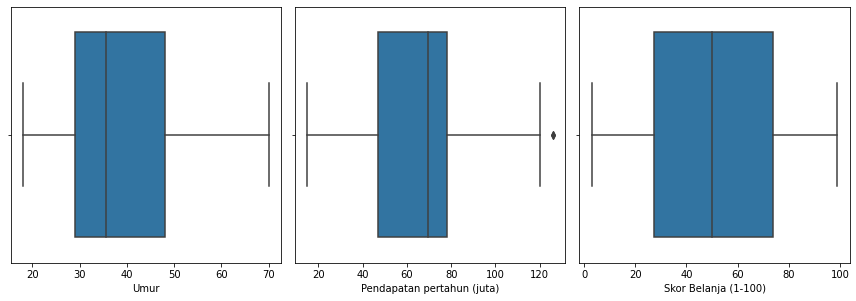

In [346]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sesudah handling outlier
#Kolom ID Pelanggan tidak ikut ditampilkan

plottingBoxplot(df_ffill.describe().columns[1:])

**Expected output**

- **Melihat adanya pencilan menggunakan Boxplot (Sebelum hapus outlier):**

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)

- **Data frame setelah menghapus outlier:**

![](https://puu.sh/IIOxx/b0d9c3d73e.png)

- **Melihat adanya pencilan menggunakan Boxplot (Setelah hapus outlier):**
![](https://puu.sh/IIOA5/de25854dfa.png)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket adalah 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik probabilitas p-value)!
*   Level significat value acuan (disebut juga level alpha) adalah 5%
*   Gunakan variabel dataframe **hasil handling missing value dan outlier dari soal sebelumnya**
*   Berikan uraian analisis uji hipotesis menggunakan teknik p-value (untuk mendapatkan nilai p-value, silahkan gunakan fungsi **"ztest"** dari library **statsmodels.stats.weightstats**)
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [347]:
#Lakukan sampling
#Isi bagian yang kosong dengan nama dataframe tempat anda menyimpan hasil no. 3

df_100 = df_ffill.sample(100,  random_state=1)
display(df_100)

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,69,Laki-laki,19.0,48,59.0
248,249,Perempuan,32.0,97,86.0
211,212,Laki-laki,25.0,77,12.0
225,226,Laki-laki,30.0,78,4.0
91,92,Laki-laki,18.0,59,41.0
...,...,...,...,...,...
5,6,Perempuan,22.0,17,76.0
184,185,Perempuan,41.0,99,39.0
186,187,Perempuan,54.0,101,24.0
49,50,Perempuan,31.0,40,42.0


In [348]:
#Ubah value kolom Umur dari float menjadi integer
df_100.Umur = df_100.Umur.astype(int)
df_100.Umur.head()

68     19
248    32
211    25
225    30
91     18
Name: Umur, dtype: int64

In [349]:
# menggunakan teknik p-value
# Isi bagian yang kosong

from statsmodels.stats.weightstats import ztest

z_test, p_value = ztest(x1 = df_100.Umur, value =35)

#print the Results
print(f'Z-test is :{z_test}')
print(f'p-value is :{p_value}')

Z-test is :2.4874107887154624
p-value is :0.012867672183696988


**Expected Output:**

Z-Test is: 2.48741...
<br>P-value is: 0.01286767...

<br>\[Uraian analisis berdasarkan p-value\]

*Dari hasil p-value yang didapat, ditemukan nilai p-value lebih rendah dari 0.05. Sehingga, dari nilai p-value tersebut dapat dikatakan bahwa hipotesis tersebut cukup terpenuhi. Dengan kata lain, rata-rata usia pengunjung supermarket adalah 35 tahun.*



---



---



---



## Soal 5. EDA

### 5.a. Univariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom **dataset awal sebelum dilakukan handling missing value maupun outlier**.
<br><br>
Jenis plot yang digunakan adalah distplot seaborn

In [350]:
def plottingDistplot(columns):
  plt.figure(figsize=(12,6))

  for i,col in enumerate(columns):
    plt.subplot(2,3, i+1)
    sns.distplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()

  plt.show()

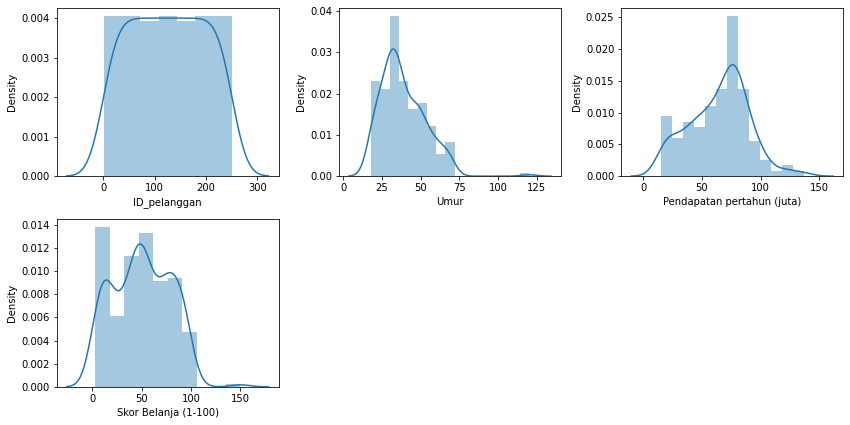

In [351]:
plottingDistplot(df.describe().columns)

**Expected Output:**

![](https://puu.sh/IIOGG/54e31ca7e0.png)

\[Uraian analisis berdasarkan output grafik analisis univariat yang didapat\]



1. Tingkat umur pengunjung minimarket tertinggi ada pada kurang lebih umur 35 tahun.
2. Tingkat pendapatan pertahun tertinggi berkisar pada angka 75 juta.
3. Tingkat skor belanja tertinggi ada pada angka 50.
4. Jumlah pelanggan dilihat dari grafik distplot ID_Pelanggan menunjukkan sebanyak 250 pelanggan.



---

### 5.b. Bivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi barplot untuk melihat perbandingan skor belanja antara pengunjung perempuan dengan pengunjung lai-laki pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

#### > Sort dataframe berdasarkan Skor Belanja, dari besar ke kecil


In [352]:
skor = df.sort_values(by=['Skor Belanja (1-100)'], ascending=False)
skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0
...,...,...,...,...,...
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN


#### > Tampilkan 5 data teratasnya

In [353]:
skor.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0


#### > Tampilkan 5 data terbawahnya

In [354]:
skor.tail()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN
117,118,Perempuan,49.0,65,NaN


#### > Buat grafiknya menggunakan barplot seaborn

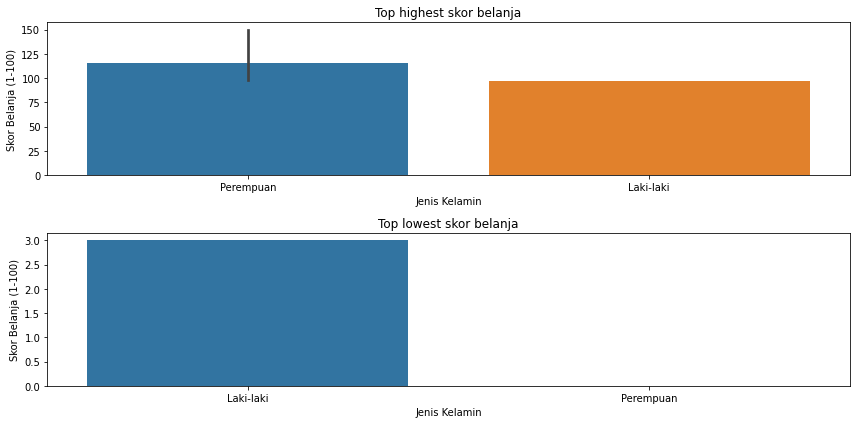

In [355]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
sns.barplot(data=skor.head(), x='Jenis Kelamin', y='Skor Belanja (1-100)')
plt.title('Top highest skor belanja')
plt.tight_layout()

plt.subplot(2,1,2)
sns.barplot(data=skor.tail(), x='Jenis Kelamin', y='Skor Belanja (1-100)')
plt.title('Top lowest skor belanja')
plt.tight_layout()

**Expected output:**

![](https://puu.sh/IIOLu/8c1c76b5e4.png)

\[Uraian analisis dari grafik bivariat yang didapat\]

1. Pelanggan perempuan memiliki tingkat skor belanja yang lebih tinggi dibandingkan laki-laki.
2. Sedangkan pelanggan perempuan, tidak ada yang berada pada posisi skor belanja terendah jika dibandingkan dengan laki-laki.
3. Terdapat beberapa pelanggan perempuan yang memiliki skor belanja jauh lebih tinggi di atas rata-rata skor belanja tertinggi.

---

### 5.c. Multivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi heatmap sebagai multivariate analisis untuk melihat korelasi tertinggi dari setiap data pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

Plot menggunakan heatmap seaborn.

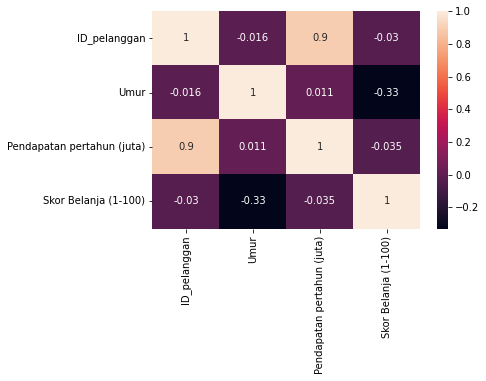

In [356]:
#Isi bagian yang kosong
sns.heatmap(df[df.describe().columns].corr(), annot=True, fmt='.2g')

**Expected Output:**

![](https://puu.sh/IIOQG/57c5ba3219.png)

\[Uraian analisis dari grafik multivariat yang didapat\]

1. Data Umur dengan data Pendapatan pertahun (juta) memiliki perbandingan korelasi yang positif, sebanyak 0.011.
2. Data Umur dengan data Skor Belanja (1-100) memiliki perbandingan korelasi yang negatif, sebanyak -0.33.
3. Data Pendapatan pertahun (juta) memiliki perbandingan korelasi yang negatif, sebanyak -0.035.
4. Data ID_Pelanggan dengan data Umur memiliki perbandingan korelasi yang negatif, sebanyak -0.016.
5. Data ID_Pelanggan dengan data Pendapatan pertahun (juta) memiliki perbandingan korelasi yang positif, sebanyak 0.9.
6. Data ID_Pelanggan dengan data Skor Belanja (1-100) memiliki perbandingan korelasi yang negatif, sebanyak -0.03.



---

---



---





# Soal 6
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi **menggunakan variabel dataframe setelah handling missing value dan outlier**

In [357]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_ffill[df_ffill.describe().columns[[1,3]]])
scaled_data

array([[-1.45540807e+00, -3.96862497e-01],
       [-1.30503831e+00,  1.12123573e+00],
       [-1.38022319e+00, -1.58965396e+00],
       [-1.15466856e+00,  9.76654949e-01],
       [-5.53189542e-01, -3.60717301e-01],
       [-1.22985343e+00,  9.40509753e-01],
       [-2.52450034e-01, -1.58965396e+00],
       [-1.15466856e+00,  1.59112328e+00],
       [ 1.92791140e+00, -1.69808955e+00],
       [-6.28374419e-01,  7.95928969e-01],
       [ 2.15346603e+00, -1.30049240e+00],
       [-2.52450034e-01,  1.77184926e+00],
       [ 1.47680214e+00, -1.26434720e+00],
       [-1.07948368e+00,  9.76654949e-01],
       [-1.02080280e-01, -1.33663759e+00],
       [-1.22985343e+00,  1.04894534e+00],
       [-1.38022319e+00,  5.79057793e-01],
       [ 1.02569287e+00, -7.58314456e-01],
       [-2.52450034e-01,  1.73570406e+00],
       [-2.52450034e-01, -5.41443281e-01],
       [-1.00429880e+00,  8.32074165e-01],
       [ 5.74583613e-01, -1.62579916e+00],
       [-5.53189542e-01,  8.32074165e-01],
       [ 1.

**Expected Output (Hasil yang ditampilkan hanya sebagian):**

![](https://puu.sh/IIOZx/c4bae0561e.png)



---



---



---



# Soal 7

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [358]:
#clustering n=2
from sklearn.cluster import KMeans

new_scaled_data = pd.DataFrame(scaled_data, columns=df_ffill.describe().columns[[1,3]])

kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(new_scaled_data)
new_scaled_data_1 = new_scaled_data.copy()
new_scaled_data_1['label_kmeans_2'] = kmeans_2.labels_

new_scaled_data_1

,Umur,Skor Belanja (1-100),label_kmeans_2
0,-1.455408,-0.396862,0
1,-1.305038,1.121236,0
2,-1.380223,-1.589654,1
3,-1.154669,0.976655,0
4,-0.553190,-0.360717,0
...,...,...,...
241,-0.853929,0.687493,0
242,1.551987,-1.300492,1
243,-0.252450,1.446542,0
244,-0.102080,-0.649879,1


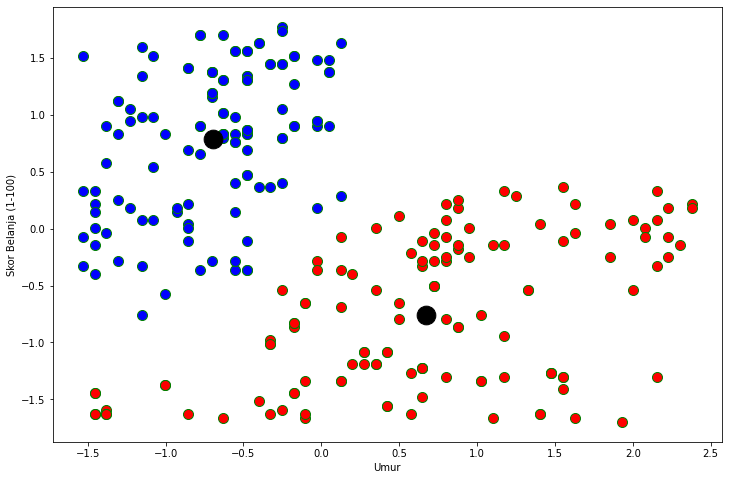

In [359]:
#visualisasi n=2 beserta centroid-centroidnya

plt.figure(figsize=(12,8))

plt.scatter(new_scaled_data_1.Umur[new_scaled_data_1.label_kmeans_2 == 0], new_scaled_data_1['Skor Belanja (1-100)'][new_scaled_data_1.label_kmeans_2 == 0], c='b', s=100, edgecolor='g')
plt.scatter(new_scaled_data_1.Umur[new_scaled_data_1.label_kmeans_2 == 1], new_scaled_data_1['Skor Belanja (1-100)'][new_scaled_data_1.label_kmeans_2 == 1], c='r', s=100, edgecolor='g')

centers = kmeans_2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=350)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

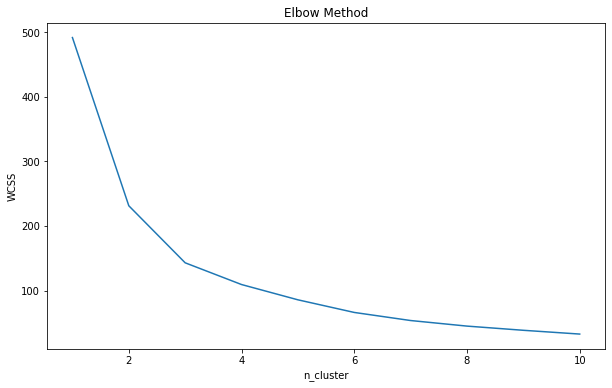

In [360]:
#elbow method beserta visualisasinya

def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k, random_state=20)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(10,6))    
    ax.plot(K_range, result)

    plt.title('Elbow Method')
    plt.xlabel('n_cluster')
    plt.ylabel('WCSS')
    
    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)
    
    plt.show()

elbowMethod(new_scaled_data)

In [362]:
#clustering n=3

kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(new_scaled_data)
new_scaled_data_2 = new_scaled_data.copy()
new_scaled_data_2['label_kmeans_3'] = kmeans_3.labels_

new_scaled_data_2

,Umur,Skor Belanja (1-100),label_kmeans_3
0,-1.455408,-0.396862,2
1,-1.305038,1.121236,0
2,-1.380223,-1.589654,2
3,-1.154669,0.976655,0
4,-0.553190,-0.360717,2
...,...,...,...
241,-0.853929,0.687493,0
242,1.551987,-1.300492,1
243,-0.252450,1.446542,0
244,-0.102080,-0.649879,2


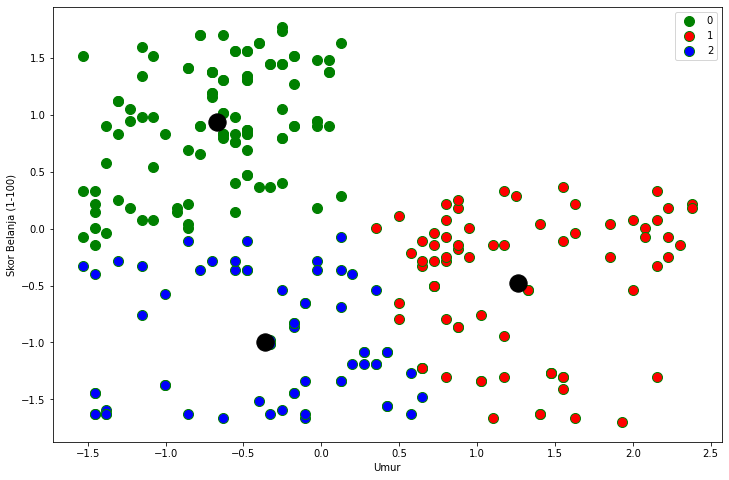

In [363]:
#visualisasi n=3 beserta centroid-centroidnya

plt.figure(figsize=(12,8))

plt.scatter(new_scaled_data_2.Umur[new_scaled_data_2.label_kmeans_3 == 0], new_scaled_data_2['Skor Belanja (1-100)'][new_scaled_data_2.label_kmeans_3 == 0], c='g', s=100, edgecolor='g', label=0)
plt.scatter(new_scaled_data_2.Umur[new_scaled_data_2.label_kmeans_3 == 1], new_scaled_data_2['Skor Belanja (1-100)'][new_scaled_data_2.label_kmeans_3 == 1], c='r', s=100, edgecolor='g', label=1)
plt.scatter(new_scaled_data_2.Umur[new_scaled_data_2.label_kmeans_3 == 2], new_scaled_data_2['Skor Belanja (1-100)'][new_scaled_data_2.label_kmeans_3 == 2], c='b', s=100, edgecolor='g', label=2)

centers = kmeans_3.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300)
plt.legend()
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)

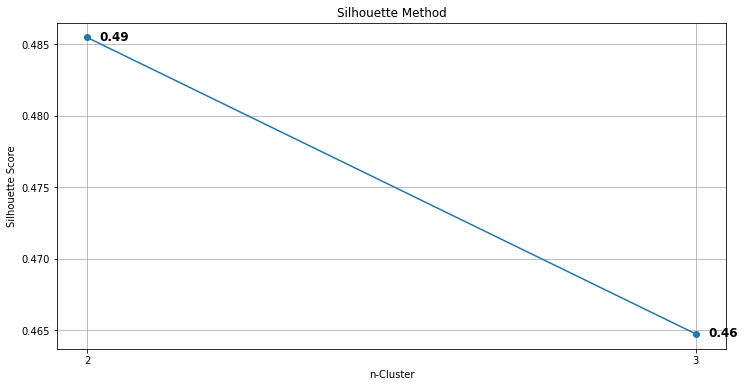

In [364]:
#tampilan silhoutte score untuk n=2 dan n=3
from sklearn.metrics import silhouette_score

def silMethod(X, k_min=2, k_max=10, save=False):
    K_range2 = range(k_min,k_max+1)

    result_sm = []
    for k in K_range2:
        model2 = KMeans(n_clusters = k, random_state=20)
        model2.fit(X)
        labels = model2.labels_
    
        s_score = silhouette_score(X, labels, metric='euclidean')
        result_sm.append(s_score)
        
    fig2, ax2 = plt.subplots(figsize=(12,6))
    ax2.plot(K_range2, result_sm, marker='o')
    
    for i, value in enumerate(result_sm):
        ax2.text(i+2.02, value-0.0002, round(value,2), fontsize=12, fontweight='bold')
    
    plt.xticks(K_range2)
    plt.grid()
    plt.title('Silhouette Method')
    plt.xlabel('n-Cluster')
    plt.ylabel('Silhouette Score')
    if save==True:
        plt.savefig('silMethod.png', dpi=200)
    plt.show()


silMethod(new_scaled_data, k_max=3)

---
---
---

## Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket.
Langkah-langkah:

* Buatlah dataframe hasil inverse scaling dari hasil pengerjaan no. 6
* Masukkan label hasil clustering K=3 ke data frame baru ini.
* Tampilkan kembali scatterplot berdasarkan data frame baru ini
* Buatlah uraian analisa dari grafik tersebut
* Berikan rekomendasi kepada manajemen supermarket tersebut untuk meningkatkan penjualan

In [365]:
#Inverse transform hasil pengerjaan no. 6 kemudian jadikanlah dataframe
inv_scaled = scaler.inverse_transform(scaled_data)

new_df1 = pd.DataFrame(data=inv_scaled,
                       columns=['Umur', 'Skor Belanja (1-100)'])

new_df1['label_k3'] = kmeans_3.labels_
new_df1

,Umur,Skor Belanja (1-100),label_k3
0,19.0,39.0,2
1,21.0,81.0,0
2,20.0,6.0,2
3,23.0,77.0,0
4,31.0,40.0,2
...,...,...,...
241,27.0,69.0,0
242,59.0,14.0,1
243,35.0,90.0,0
244,37.0,32.0,2


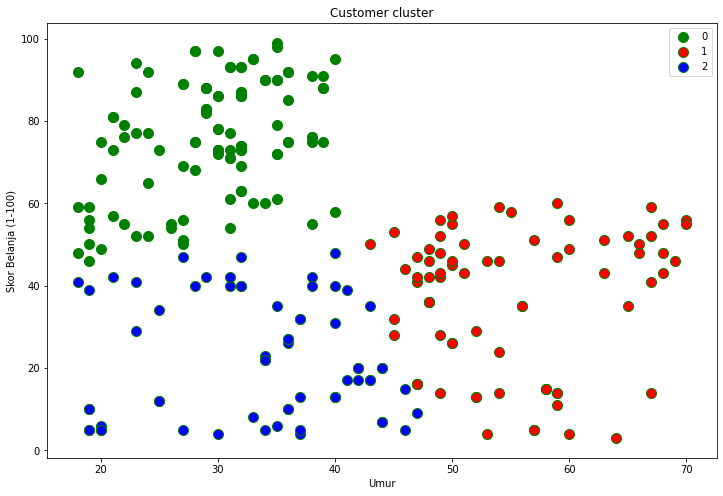

In [366]:
#Tampilkan dalam scatterplot

plt.figure(figsize=(12,8))

plt.scatter(new_df1.Umur[new_df1.label_k3 == 0], new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 0], c='g', s=100, edgecolor='g', label=0)
plt.scatter(new_df1.Umur[new_df1.label_k3 == 1], new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 1], c='r', s=100, edgecolor='g', label=1)
plt.scatter(new_df1.Umur[new_df1.label_k3 == 2], new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 2], c='b', s=100, edgecolor='g', label=2)

plt.legend()
plt.title('Customer cluster')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

\[Tulis uraian analisis grafik yang sudah anda buat di sini\]

1. Rata-rata Customer yang memiliki nilai Skor Belanja tinggi memiliki umur berkisar antara 20-40 tahun.
2. Sebagian Customer yang berumur 20-40 tahun, juga memiliki tingkat Skor Belanja menengah ke bawah.
3. Customer dengan umur 40-70, cenderung memiliki tingkat Skor Belanja menengah.

**Expected Output:**

* Dataframe hasil inverse scaling (hasil urutan nomor label mungkin berbeda, tapi tetap terdiri dari 0, 1, dan 2) <br>
![](https://puu.sh/IN3jl/3d2c66f2de.png)

* Grafik dari data frame tersebut, warna boleh berbeda, tapi perhatikan angka pada sumbu x dan y: <br>
![](https://puu.sh/IIPUx/d953c4760f.png)

* Uraian analisis & rekomendasi
<br>\[Tulis apa informasi yang kalian dapat dari grafik tersebut dan sertakan rekomendasi kalian untuk meningkatkan penjualan supermarket ini\]

1. Rata-rata Customer yang memiliki nilai Skor Belanja tinggi memiliki umur berkisar antara 20-40 tahun.
2. Buatlah media pemasaran yang sesuai agar bisa menjangkau customer terutama dengan umur 20-40 tahun untuk meningkatkan penjualan. Sesuaikan teknologi yang digunakan oleh customer dengan umur tersebut. Upaya ini untuk menjangkau kluster 2 yang berkebalikan dengan kluster 1, dimana pada rentang umur yang sama yaitu 20-40 tahun, memiliki nilai Skor Belanja yang rendah.
3. Untuk rentang umur 40-70, memiliki tingkat Skor Belanja menengah, sehingga masih bisa dioptimalkan untuk memperluas jangkauan customer pada rentang umur tersebut.